# Supervised Learning with Scikit-learn 
# KNN with the MNIST digits dataset

Now let's try with more dimension. Scikit-learn includes a reduced version of the classic MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9.

Datacamp says:

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see Chapter 2 of DataCamp's course on Data Visualization with Python). On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

Notice that you can access the keys of these Bunch objects in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images']. 

In the original MNIST dataset, the images are 28x28.

First, we import and get to know our data

## Exploring our data


In [7]:
digits = datasets.load_digits()

print(digits.DESCR)
print(digits.keys())

print(digits.images.shape)
print(digits.data.shape)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

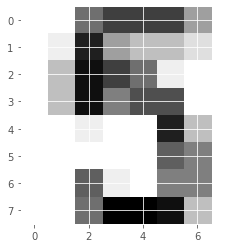

In [8]:
# Print one of the numbers

plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

After creating arrays for the features and target variable, we will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the .score() method.

In [9]:
# Create feature and target arrays
X_digits = digits.data
y_digits = digits.target

# Split into training and test set
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(X_digits, y_digits, test_size = 0.2, random_state=42, stratify=y_digits)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train_digits, y_train_digits)

# Print the accuracy
print(knn.score(X_test_digits, y_test_digits))


0.9833333333333333


## Tailor-made models: finding the ideal fit

We're going to test a range of possible Ks to find the optimal fit for our model. Not too tight, not too loose, for perfect comfort. 

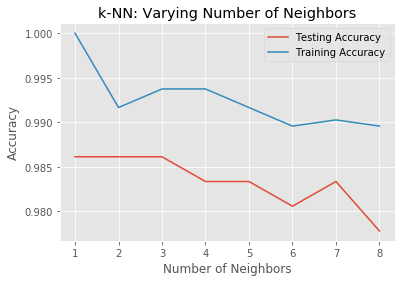

In [10]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train_digits, y_train_digits)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_digits, y_train_digits)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test_digits, y_test_digits)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

We care about the testing accuracy more than the training accuracy. 1, 2 and 3 neighbors seem to have the same accuracy. I would go with 3 so as to not overfit the model.